In [22]:
import seaborn as sns
import pandas as pd

In [23]:
import afqinsight as ai 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [24]:
from numpy import nanmean

In [25]:
nodes = pd.read_csv('combined_tract_profiles.csv')

In [26]:
buddles = sorted(list(set(nodes["tractID"])))

In [27]:
buddles

['ARC_L',
 'ARC_R',
 'ATR_L',
 'ATR_R',
 'CGC_L',
 'CGC_R',
 'CST_L',
 'CST_R',
 'FA',
 'FP',
 'IFO_L',
 'IFO_R',
 'ILF_L',
 'ILF_R',
 'SLF_L',
 'SLF_R',
 'UNC_L',
 'UNC_R']

In [28]:
node_avg = nodes.groupby(['tractID', 'subjectID']).agg(nanmean)

In [29]:
dki_md = pd.merge(node_avg.loc["ARC_L", :], node_avg.loc["ARC_R", :], on="subjectID", how="outer")[["dki_md_x", "dki_md_y"]]

In [30]:
dki_md = dki_md.rename(columns={"dki_md_x": "ARC_L", "dki_md_y": "ARC_R"})

In [31]:
for bundle in buddles[2:]:
    dki_md = pd.merge(dki_md, node_avg.loc[bundle, "dki_md"], on="subjectID", how="outer").rename(columns={"dki_md": bundle})

In [32]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
dki_md_imp = imputer.fit_transform(dki_md)

In [37]:
dki_md_imp_df = pd.DataFrame(dki_md_imp, columns = buddles)

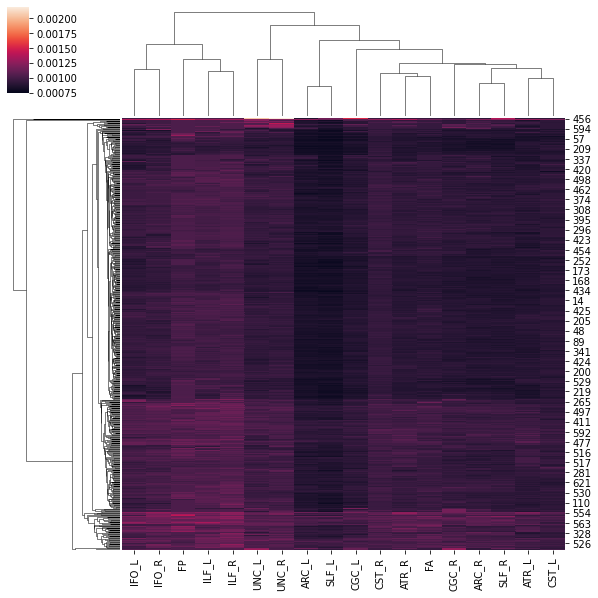

In [39]:
# df = sns.load_dataset(dki_md_imp)
sns.clustermap(dki_md_imp_df)

## FA

In [16]:
dki_fa = pd.merge(node_avg.loc["ARC_L", :], node_avg.loc["ARC_R", :], on="subjectID", how="outer")[["dki_fa_x", "dki_fa_y"]]

In [17]:
dki_fa = dki_fa.rename(columns={"dki_fa_x": "ARC_L", "dki_fa_y": "ARC_R"})

In [18]:
for bundle in buddles[2:]:
    dki_fa = pd.merge(dki_fa, node_avg.loc[bundle, "dki_fa"], on="subjectID", how="outer").rename(columns={"dki_fa": bundle})

In [19]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
dki_fa_imp = imputer.fit_transform(dki_fa)

In [41]:
dki_fa_imp_df = pd.DataFrame(dki_fa_imp, columns = buddles)

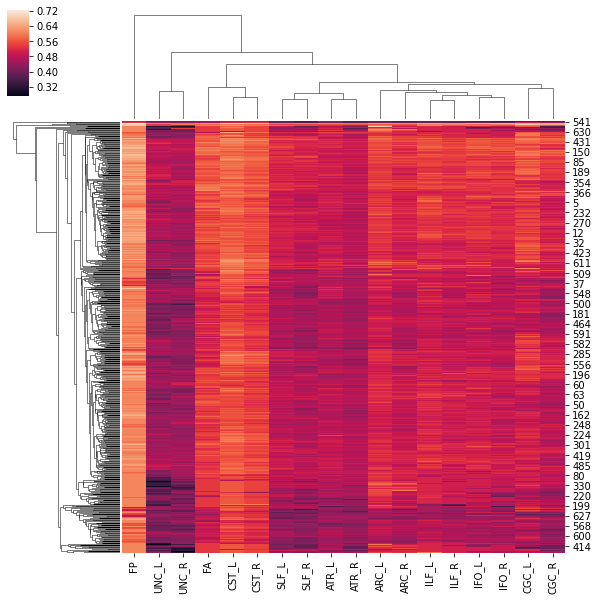

In [42]:
# df = sns.load_dataset(dki_md_imp)
sns.clustermap(dki_fa_imp_df)